<a href="https://colab.research.google.com/github/eichi7/internshipHachi-x/blob/main/03_Make_predictionsoncolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os


In [2]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load model
model=tf.keras.models.load_model("/content/drive/MyDrive/1_Labeling/models/object_detection.h6")
print('model loaded sucessfully')

model loaded sucessfully


In [7]:
path='/content/drive/MyDrive/1_Labeling/images/N207.jpeg'
image=load_img(path)
image=np.array(image,dtype=np.uint8)
image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0 #convert into array and get the normalize output



In [6]:
#size of the original image
h,w,d=image.shape
print('Height of image=',h)
print('Height of image=',w)

Height of image= 423
Height of image= 541


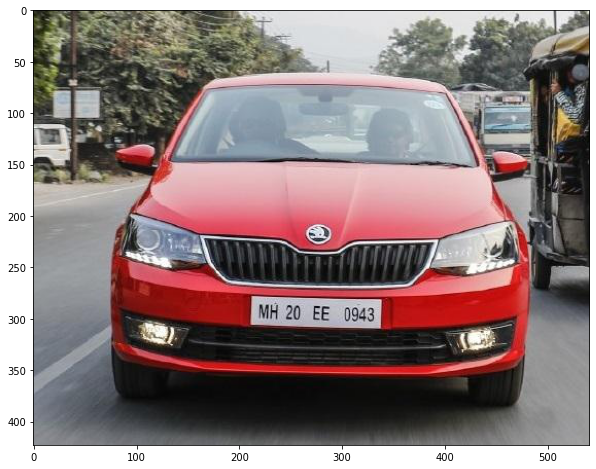

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [9]:
image_arr_224.shape

(224, 224, 3)

In [11]:
test_arr=image_arr_224.reshape(1,224,224,3)

In [12]:
test_arr.shape

(1, 224, 224, 3)

In [13]:
#make predictions
coords=model.predict(test_arr)
coords

array([[0.40241826, 0.62243813, 0.6617827 , 0.7351358 ]], dtype=float32)

In [15]:
#denormalize the value
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords


array([[217.70827639, 336.73902982, 279.93407446, 310.96244073]])

In [17]:
#change result in integer
coords=coords.astype(np.int32)
coords

array([[217, 336, 279, 310]], dtype=int32)

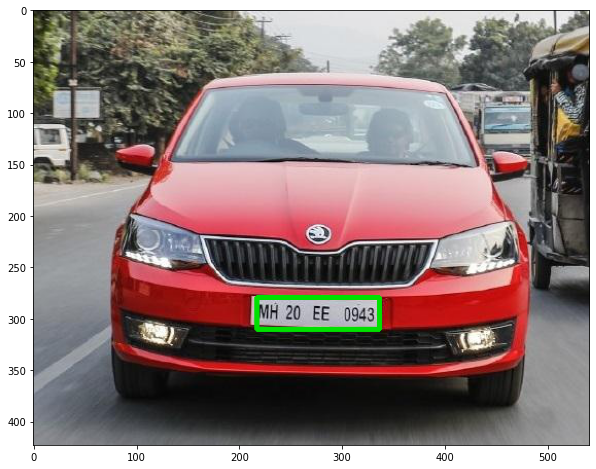

In [20]:
#draw bounding on top the image
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
cv2.rectangle(image,pt1,pt2,(0,225,0),3)
#show the image
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [22]:
#create pipeline
path='/content/drive/MyDrive/1_Labeling/images/N207.jpeg'
def object_detection(path):
  #read image
  image=load_img(path)
  image=np.array(image,dtype=np.uint8)
  image1=load_img(path,target_size=(224,224))
  #preprocessing
  image_arr_224=img_to_array(image1)/255.0 #convert into array and get the normalize output

  #size of the original image
  h,w,d=image.shape
  image_arr_224.shape
  test_arr=image_arr_224.reshape(1,224,224,3)
  test_arr.shape
  #make predictions
  coords=model.predict(test_arr)
  #denormalize the value
  denorm=np.array([w,w,h,h])
  coords=coords*denorm
  #change result in integer
  coords=coords.astype(np.int32)
  #draw bounding on top the image
  xmin,xmax,ymin,ymax=coords[0]
  pt1=(xmin,ymin)
  pt2=(xmax,ymax)
  print(pt1,pt2)
  cv2.rectangle(image,pt1,pt2,(0,225,0),3)
  return image,coords
 


In [23]:
path='/content/drive/MyDrive/1_Labeling/images/N147.jpeg'
image,cods=object_detection(path)


(388, 534) (571, 611)


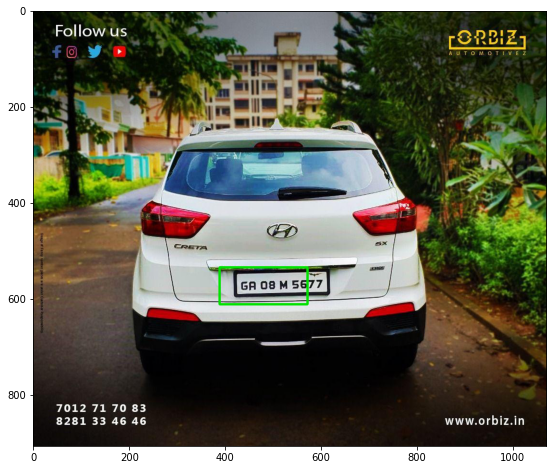

In [25]:
#show the image
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [26]:
#to better accuracy we need more images